### <center>  Business goal </center>
### <center>Data collection - Data gathering
### <center>Data analysis and understanding
### <center>Data preparation
### <center>Modeling and model evaluation
### <center>Business goal evaluation
### <center> Implementation </center>

---



# Data Acquisition

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LF/Prep Course/Session-6/Titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.Sex.nunique()

2

In [ ]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

# Data Preparation

In [ ]:
x = df[['Pclass','Age','SibSp','Parch','Fare']]
y = df[['Survived']]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


# Modeling

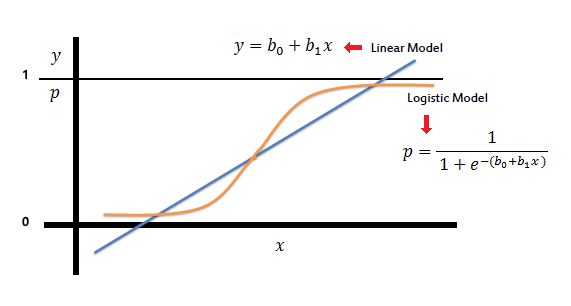**bold text**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x,y)

ValueError: ignored

# Age columns has missing data NaN values

What can we do

In [ ]:
clean_df = df.dropna(axis=0, subset=['Age'])
clean_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
x = clean_df[['Pclass','Age','SibSp','Parch','Fare']]
y = clean_df[['Survived']]

In [ ]:
model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation

In [ ]:
model.score(x,y)

0.7002801120448179

# Add more columns

In [ ]:
clean_df['Sex'] = df['Sex'].replace(['female','male'],[0,1])
clean_df['Embarked'] = df['Embarked'].replace(['S','C','Q'],[0,1,2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
clean_df = clean_df.dropna(axis=0, subset=['Embarked'])

In [ ]:
x = clean_df[['Pclass','Age','SibSp','Parch','Sex','Embarked']] #'Fare',,'Cabin','Family'
y = clean_df[['Survived']]

In [ ]:
model.fit(x,y)
model.score(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8089887640449438

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y, model.predict(x))

0.8089887640449438

# Additional features

In [ ]:
clean_df['Family'] = clean_df['SibSp'] + clean_df['Parch']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x = clean_df[['Pclass','Age','SibSp','Parch','Sex','Embarked','Family']] #'Fare',,'Family'
y = clean_df[['Survived']]

In [ ]:
x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex', 'Embarked', 'Family'], dtype='object')

In [ ]:
model.fit(x,y)
accuracy_score(y, model.predict(x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8089887640449438

# Additional Features

In [ ]:
clean_df.Cabin = clean_df.Cabin.map(lambda x: str(x)[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
clean_df.Cabin.value_counts()

n    529
C     51
B     43
D     31
E     30
A     12
F     11
G      4
T      1
Name: Cabin, dtype: int64

In [ ]:
clean_df['Cabin'] = clean_df['Cabin'].replace(['n','C','B','D','E','A','F','G','T'],[0,1,2,3,4,5,6,7,8])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x = clean_df[['Pclass','Age','SibSp','Parch','Sex','Embarked','Cabin','Family']] #'Fare',
y = clean_df[['Survived']]

In [ ]:
model.fit(x,y)
accuracy_score(y, model.predict(x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8103932584269663

In [ ]:
x.corr()

,Pclass,Age,SibSp,Parch,Sex,Embarked,Cabin
Pclass,1.000000,-0.365902,0.065187,0.023666,0.150826,-0.108502,-0.505551
Age,-0.365902,1.000000,-0.307351,-0.187896,0.099037,0.012186,0.169394
SibSp,0.065187,-0.307351,1.000000,0.383338,-0.106296,0.004021,-0.057148
Parch,0.023666,-0.187896,0.383338,1.000000,-0.249543,-0.014082,0.008330
Sex,0.150826,0.099037,-0.106296,-0.249543,1.000000,-0.097129,-0.091923
Embarked,-0.108502,0.012186,0.004021,-0.014082,-0.097129,1.000000,0.045819
Cabin,-0.505551,0.169394,-0.057148,0.008330,-0.091923,0.045819,1.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier()
r.fit(x,y)
r.score(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9550561797752809

# Consider splitting differently

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25)


In [ ]:
xtrain.shape, ytrain.shape

((535, 5), (535, 1))

In [ ]:
xtest.shape, ytest.shape

((179, 5), (179, 1))

In [ ]:
new_model = LogisticRegression()
new_model.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
new_model.score(xtrain,ytrain)

0.7158878504672898

In [ ]:
new_model.score(xtest,ytest)

0.6871508379888268

# Going back to data acquisition

In [ ]:
x = clean_df[['Pclass','Age','SibSp','Parch','Fare','Sex']]
y = clean_df[['Survived']]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((535, 6), (535, 1), (179, 6), (179, 1))

In [ ]:
new_model2 = LogisticRegression()
new_model2.fit(xtrain,ytrain)

ValueError: ignored

In [ ]:
x['Sex'] = x['Sex'].replace(['female','male'],[0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((535, 6), (535, 1), (179, 6), (179, 1))

In [ ]:
new_model2 = LogisticRegression()
new_model2.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
new_model2.score(xtrain,ytrain)

0.8149532710280374

In [ ]:
new_model2.score(xtest,ytest)

0.7932960893854749

In [ ]:
from sklearn.metrics import accuracy_score

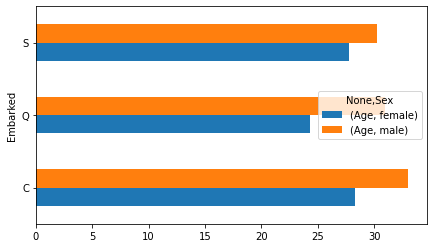

In [ ]:
df.groupby(['Embarked','Sex'])[['Age']].mean().unstack().plot(kind='barh', figsize=(7,4))

In [ ]:
df.groupby(['Embarked','Sex'])[['Age']].mean()

Age
Embarked Sex              
C        female  28.344262
         male    32.998841
Q        female  24.291667
         male    30.937500
S        female  27.771505
         male    30.291440

In [ ]:
x.Sex = x.Sex.map(lambda x: 0 if x=='male' else 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
